### Working notebook to test possible implementations and applications of a Hampel Filters in the analysis toolkit

In [1]:
import numpy as np
import sys
sys.path.append('../')
import heartbeat as hb
import matplotlib.pyplot as plt

[346. 345. 349. ... 338. 337. 341.]


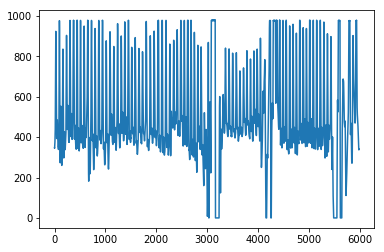

In [2]:
data = hb.get_data('pp8_Som_Ven_C0_data.txt')[:,1]

print(data)

plt.plot(data)
plt.show()

In [10]:
def MAD(data):
    '''function to compute median absolute deviation of data slice
       https://en.wikipedia.org/wiki/Median_absolute_deviation
    
    keyword arguments:
    - data: 1-dimensional numpy array containing data
    '''
    med = np.median(data)
    return np.mean(np.abs(data - med))

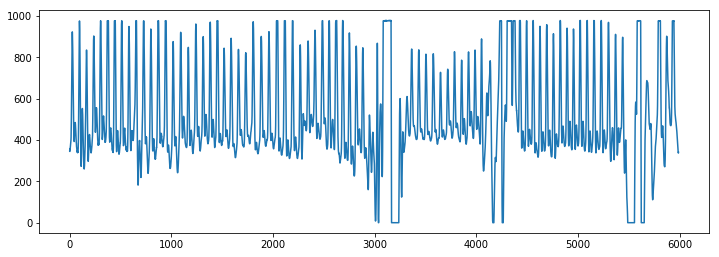

In [11]:
#let's explore the MAD result given the signal
filtsize = 6
onesided_filt = filtsize // 2
madarray = []
for i in range(onesided_filt, len(data) - onesided_filt - 1):
    mad = MAD(data[i - onesided_filt : i + onesided_filt])
    madarray.append(mad)

plt.figure(figsize=(12,9))
plt.subplot(211)
plt.plot(data)
plt.show()

In [12]:
def hampelfilt(data, filtsize=6):
    '''function to detect outliers based on hampel filter
       filter takes datapoint and six surrounding samples.
       Detect outliers based on being more than 3std from window mean
    
    keyword arguments:
    - data: 1-dimensional numpy array containing data
    - filtsize: the filter size expressed the number of datapoints
                taken surrounding the analysed datapoint. a filtsize
                of 6 means three datapoints on each side are taken.
                total filtersize is thus filtsize + 1 (datapoint evaluated)
    '''
    datatmp = [x for x in data]
    onesided_filt = filtsize // 2
    for i in range(onesided_filt, len(data) - onesided_filt - 1):
        dataslice = datatmp[i - onesided_filt : i + onesided_filt]
        mad = MAD(dataslice)
        median = np.median(dataslice)
        if datatmp[i] > median + (3 * mad):
            #print('%s, %s' %(datatmp[i], 3 * mad))
            datatmp[i] = median
    return datatmp

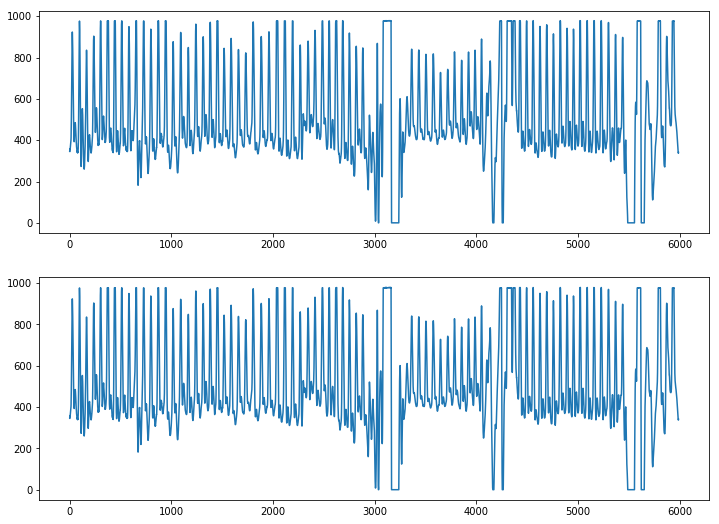

In [13]:
filtereddata = hampelfilt(data, filtsize=6)

plt.figure(figsize=(12,9))
plt.subplot(211)
plt.plot(data)
plt.subplot(212)
plt.plot(filtereddata)
plt.show()

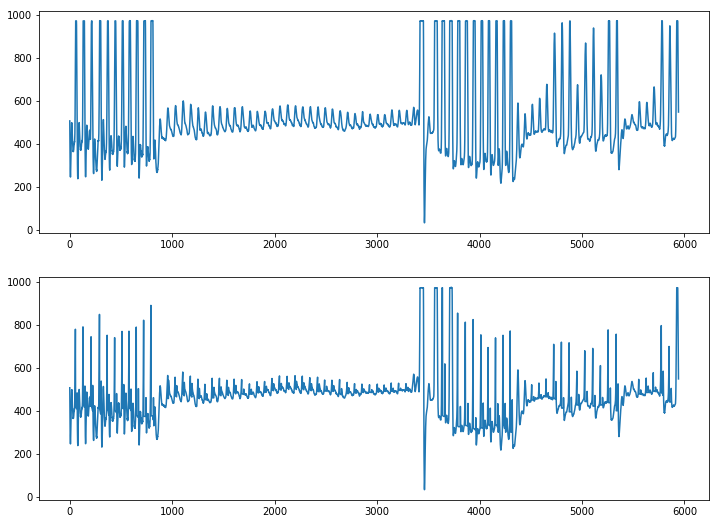

In [14]:
newdata = hb.get_data('amplitudevar.txt')[:,1]

newfiltereddata = hampelfilt(newdata, filtsize=100)

plt.figure(figsize=(12,9))
plt.subplot(211)
plt.plot(newdata)
plt.subplot(212)
plt.plot(newfiltereddata)
plt.show()

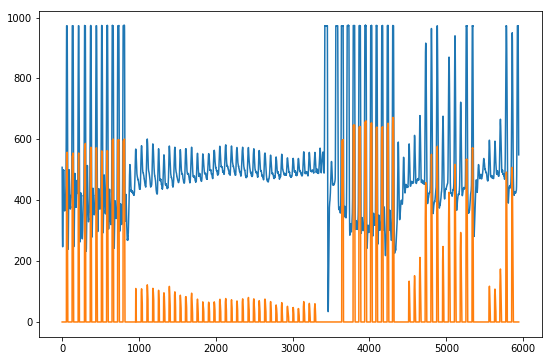

In [15]:
diff = newdata - newfiltereddata

plt.figure(figsize=(9,6))
plt.plot(newdata)
plt.plot(diff)
plt.show()

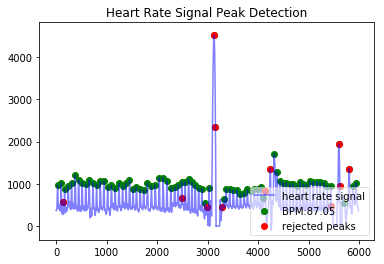

current full approach took: 0.1818224881782342 sec
new pre-processing approach took: 0.8064333143458741 sec
rmssd: 45.912270, sdsd: 35.938976, ibi: 689.275362
rmssd: 49.127989, sdsd: 30.761661, ibi: 701.129032


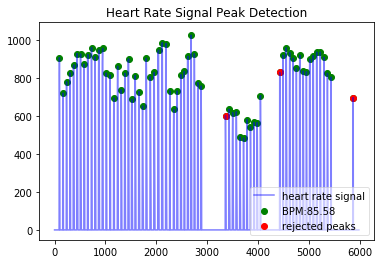

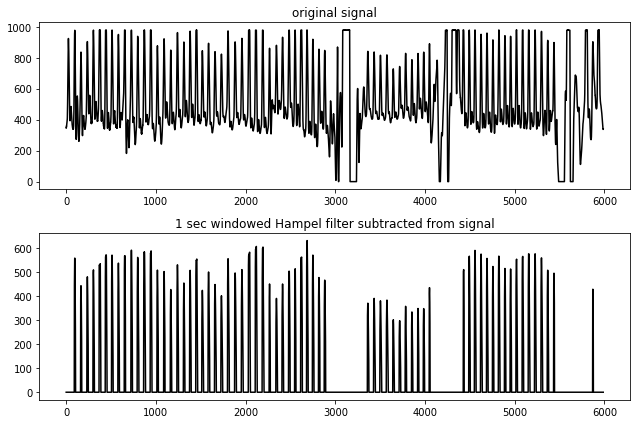

5988
5988


In [16]:
import time
fs = 100.0

t1 = time.clock()
measures = hb.process(data, 100.0)
hb.plotter()
t_total = time.clock() - t1

print('current full approach took: %s sec' %t_total)

t1 = time.clock()
diff2 = data - hampelfilt(data, filtsize = 100)
t_total = time.clock() - t1

print('new pre-processing approach took: %s sec' %t_total)

#print(hb.working_data['RR_list_cor'])
print('rmssd: %f, sdsd: %f, ibi: %f' %(measures['rmssd'], measures['sdsd'], measures['ibi']))
m = hb.process(diff2, 100.0)
#print(hb.working_data['RR_list_cor'])
print('rmssd: %f, sdsd: %f, ibi: %f' %(measures['rmssd'], measures['sdsd'], measures['ibi']))
hb.plotter()

plt.figure(figsize=(9,6))
plt.subplot(211)
plt.plot(data, color='black')
plt.title('original signal')
plt.subplot(212)
plt.plot(diff2, color='black')
plt.title('1 sec windowed Hampel filter subtracted from signal')
plt.tight_layout()
plt.show()

print(len(data))
print(len(diff2))

took: 11.795863907166078 sec


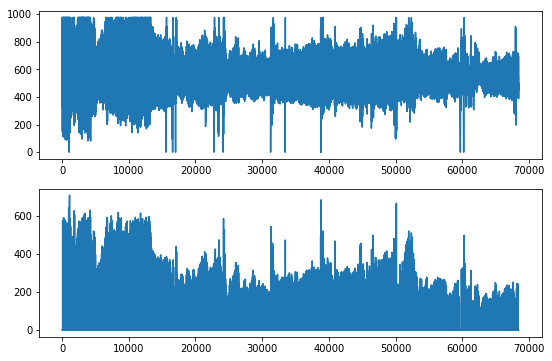

In [12]:
data3 = hb.get_data('../data3.csv', column_name='hr')

fs = hb.get_samplerate_datetime(hb.get_data('../data3.csv', column_name='datetime'),
                             timeformat='%Y-%m-%d %H:%M:%S.%f')

t1 = time.clock()
diff3 = data3 - hampelfilt(data3, filtsize = 100)
t_total = time.clock() - t1

print('took: %s sec' %t_total)

plt.figure(figsize=(9,6))
plt.subplot(211)
plt.plot(data3)
plt.subplot(212)
plt.plot(diff3)
plt.show()

In [34]:
ardd = np.genfromtxt('C:/Users/localadmin/Desktop/output.csv', delimiter=',')
ardd= ardd[:,0]

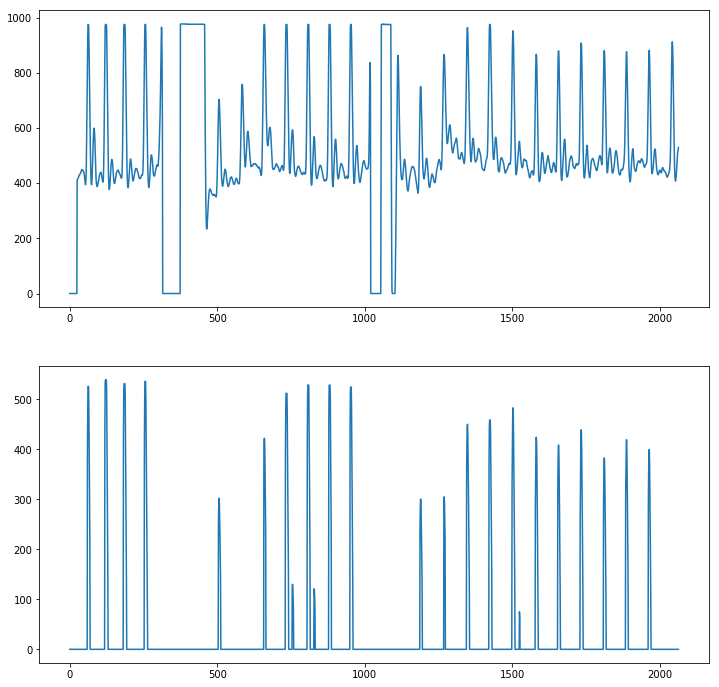

In [36]:
arddiff = ardd - hampelfilt(ardd, 50)
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(ardd)
plt.subplot(212)
plt.plot(arddiff)
plt.show()